# Image Processing with ```rasterio```

This notebook demonstrates how to perform some band arithmatic using ```rasterio```.

In [12]:
%matplotlib inline
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import numpy as np
import glob
import os
import matplotlib
import matplotlib.pyplot as plt

## NAIP 4-band

Let's create an NDVI using a 4-band NAIP image on Azure.

In [2]:
image = 'http://naipblobs.blob.core.windows.net/naip/data/v1/2012/states/mo/mo_1m_2012/35089/m_3508901_ne_16_1_20120614.mrf'

## Open the image


In [5]:
src = rasterio.open(image)

## Plot the images

I will read the bands into individual numpy arrays.

In [6]:
# Convert to numpy arrays
r = src.read(1)
g = src.read(2)
b = src.read(3)
ir = src.read(4)

## NDVI Function

In [7]:
def calc_ndvi(nir,red):
    '''Calculate NDVI from integer arrays'''
    nir = nir.astype('f4')
    red = red.astype('f4')
    ndvi = (nir - red) / (nir + red)
    return ndvi

## Calculating NDVI

In [8]:
ndvi = calc_ndvi(ir,r)

## Showing the NDVI result

Text(0, 0.5, 'Row #')

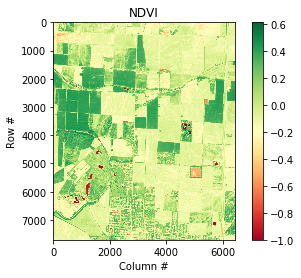

In [14]:
plt.imshow(ndvi)#,cmap='terrain')
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI')
plt.xlabel('Column #')
plt.ylabel('Row #')

## Compared to the RGB Image

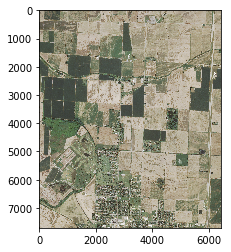

In [16]:
# Stack bands
rgb = np.stack((r, g, b))
show(rgb)

## Write to disk

Finally, I can write the NDVI to disk in GeoTIFF format. MRF won't work for rasters with ```float``` values.

In [36]:
outpath = r"C:\PROJECTS\DEVELOPING_IMAGERY_ARTIFACTS\Week3\NDVI.TIF"

In [39]:
out_ndvi = np.zeros((1,ndvi.shape[0],ndvi.shape[1]))
out_ndvi[0,:,:] = ndvi
with rasterio.open(outpath,"w", driver ='GTIFF',count=1,
            height= ndvi.shape[0],
            width= ndvi.shape[1],
            transform= src.transform,
            crs= src.crs,
            dtype= np.dtype('f4')) as dest:
    dest.write(out_ndvi.astype('f4'))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 43: invalid start byte

Exception ignored in: 'rasterio._env.log_error'
UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 43: invalid start byte
